In [40]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import datetime
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [75]:
train=pd.read_csv('~/Documents/train.csv')
test=pd.read_csv('~/Documents/test.csv')

In [87]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [82]:
product_id_res=train.groupby(["Product_ID"])["Purchase"].mean()
avg_cost = train["Purchase"].mean()
product_id_res_map = {}

In [83]:
val = product_id_res.iteritems()
for key, value in val:
    p_id = str(key)
    product_id_res_map[p_id] = value

In [43]:
y=train['Purchase']
train=train.drop(['Purchase','User_ID','Product_ID'],axis=1)
subs=test[['User_ID','Product_ID']]
test=test.drop(['User_ID','Product_ID'],axis=1)

In [44]:
obj_cols = [x for x in train.columns if train[x].dtype == 'object']
encoder=LabelEncoder()
for x in obj_cols:
    encoder.fit(pd.concat([train, test],join="outer")[x].astype(str))
    train[x] = encoder.transform(train[x].astype(str))
    test[x] = encoder.transform(test[x].astype(str))

In [45]:
train['Product_Category_2'].fillna(train['Product_Category_2'].median(), inplace=True)
test['Product_Category_2'].fillna(test['Product_Category_2'].median(), inplace=True)

In [46]:
train['Product_Category_3'].fillna(train['Product_Category_3'].median(), inplace=True)
test['Product_Category_3'].fillna(test['Product_Category_3'].median(), inplace=True)

In [47]:
# train=pd.get_dummies(train,columns=['Age','Maritial_Status','Stay_In_Current_City_Years','City_Category','Gender'])

In [48]:
train.head(18)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,9.0,14.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,9.0,14.0
3,0,0,10,0,2,0,12,14.0,14.0
4,1,6,16,2,4,0,8,9.0,14.0
5,1,2,15,0,3,0,1,2.0,14.0
6,1,4,7,1,2,1,1,8.0,17.0
7,1,4,7,1,2,1,1,15.0,14.0
8,1,4,7,1,2,1,1,16.0,14.0
9,1,2,20,0,1,1,8,9.0,14.0


In [66]:
from sklearn.model_selection import GridSearchCV

In [49]:
X_train,x_test,Y_train,y_test=train_test_split(train,y,test_size=0.4,random_state=4)

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

forest_reg = xgb.XGBRegressor(max_depth=4, n_estimators=5000,learning_rate=0.05, min_child_weight = 6, gamma = 0,colsample_bytree = 0.8,nthread=4).fit(X_train, Y_train) 
# forest_reg=GradientBoostingRegressor(random_state=4,n_estimators=330,learning_rate=0.03).fit(X_train, Y_train)

preds = forest_reg.predict(x_test)

np.sqrt(mean_squared_error(y_test, preds))

2888.6377369853321

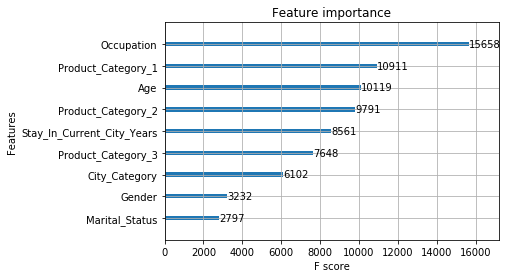

In [72]:
xgb.plot_importance(forest_reg)

In [73]:
from IPython.display import FileLink
from sklearn.ensemble import RandomForestRegressor

forest_reg = xgb.XGBRegressor(max_depth=4, n_estimators=5000,learning_rate=0.05, min_child_weight = 6, gamma = 0,colsample_bytree = 0.8,nthread=4).fit(train, y) 

# forest_reg = xgb.XGBRegressor(max_depth=4, n_estimators=500, learning_rate=0.05).fit(train, y)
# forest_reg1=RandomForestRegressor(n_estimators=240,max_depth=10).fit(train, y)
# forest_reg = RandomForestClassifier(max_depth=3,random_state=6).fit(train, y)
preds = forest_reg.predict(test)
# preds1 = forest_reg1.predict(test)
# preds=(preds0+preds1)/2

sub = pd.DataFrame({'User_ID': subs['User_ID'], 'Product_ID': subs['Product_ID'],'Purchase': preds})
filename = 'xgfraud1.csv'
sub.to_csv(filename, index=False)
FileLink(filename)

/home/paras/paras/xgfraud1.csv